# **Project Name - Online Retail Customer Segmentation**


## project Type- Unsupervised

# Contribution - Samyuktha(Individual)
p align="center">
  <img width="750" height="300" src="https://blog.intercomassets.com/blog/wp-content/uploads/2020/10/Customer-segmentation-performance-matrix.png">
</p>

## project summary##
*This project focuses on Online Retail Customer Segmentation, a vital aspect of modern business. By categorizing customers into distinct groups based on their characteristics, businesses can gain valuable insights and tailor their strategies to meet the unique needs of each segment.

*The objective of this project was to analyze a transnational dataset from a UK-based online retail company specializing in all-occasion gifts. The dataset covered a period of time from 01/12/2010 to 09/12/2011 and included transactions made by individual customers as well as wholesalers.

*To achieve this, I utilized the Recency-Frequency-Monetary (RFM) model, which assigns quantitative values to customers based on three key dimensions: recency of their last purchase, frequency of their transactions, and monetary value of their purchases. By leveraging advanced clustering algorithms such as K-Means, Agglomerative Hierarchical Clustering, and DBSCAN, I successfully segmented the customers into distinct groups.

*The project involved various steps, including data inspection, exploratory data analysis (EDA), data preparation, RFM model creation, and implementation of clustering models. Through these steps, I gained meaningful insights into customer behavior, identified key customer segments, and drew valuable conclusions that can guide targeted marketing strategies and enhance customer satisfaction.

*Overall, this project showcased my expertise in data analysis, customer segmentation, and implementation of clustering algorithms. The insights obtained from this project can empower businesses to optimize their offerings, improve customer experiences, and drive growth in the competitive online retail industry.


# GitHub Link
https://github.com/samyuktha1502/.-Data-Mining-for-Retail-Customer-Segmentation

# Index
*Let's Begin!*

# 1. Problem Statement
The objective of this project is to develop a customer segmentation model for an online retail business in order to gain valuable insights into the customer base and implement targeted strategies to enhance customer satisfaction, increase sales, and optimize marketing efforts. By analyzing transactional data and customer attributes such as purchasing behavior, demographics, and geographic location, the project aims to create meaningful customer segments that can drive personalized marketing campaigns, improve inventory management, and foster customer loyalty.

# 2. Know Your Data



**Import Libraries**

In [ ]:
# Import Libraries

import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_columns', 500)

plt.style.use('ggplot')

import missingno as msno


from sklearn import preprocessing
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

<ipython-input-8-fcb28331da48>:5: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  from numpy import math


# Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install q keras

In [ ]:
# Load Dataset
retail_df = pd.read_excel("/content/OnlineRetail.xlsx")

In [ ]:
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
retail_df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


In [ ]:
retail_df.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
280777,561502,23322,LARGE WHITE HEART OF WICKER,18,7/27/2011 14:14,2.95,14305.0,United Kingdom
376633,569528,22567,20 DOLLY PEGS RETROSPOT,4,10/4/2011 14:53,1.45,16242.0,United Kingdom
234606,557570,22294,HEART FILIGREE DOVE SMALL,4,6/21/2011 10:48,1.25,15998.0,United Kingdom
484421,577531,23150,IVORY SWEETHEART SOAP DISH,1,11/20/2011 13:58,4.96,NaN,United Kingdom
479105,577140,23569,TRADTIONAL ALPHABET STAMP SET,4,11/18/2011 9:10,4.95,13269.0,United Kingdom


In [ ]:
 #dimensions of the datasets

import pandas as pd

# Assuming 'retail_df' is already loaded as in the provided code
retail_df.shape

(541909, 8)

In [ ]:
print('The total number of columns in the dataset: ', retail_df.shape[1], '\nThese are:')

count = 1
for col in retail_df.columns.to_list():
  print(count,'.', col)
  count += 1

The total number of columns in the dataset:  8 
These are:
1 . InvoiceNo
2 . StockCode
3 . Description
4 . Quantity
5 . InvoiceDate
6 . UnitPrice
7 . CustomerID
8 . Country


In [ ]:
# Dataset Info
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
# Dataset Duplicate Value Count
dup = retail_df.duplicated().sum()
print(f'The total number of duplicated values in the dataset: {dup}')

The total number of duplicated values in the dataset: 5268


In [ ]:
missing = retail_df.columns[retail_df.isnull().any()].tolist()
missing
round(retail_df[missing].isnull().mean() * 100, 2).sort_values(ascending = False)

,0
CustomerID,24.93
Description,0.27


In [ ]:
# Missing Values/Null Values Count
missing = retail_df.columns[retail_df.isnull().any()].tolist()
missing

print('Missing Data count')
print(retail_df[missing].isnull().sum().sort_values(ascending=False))
print()

print('++'*12)
print()
print('Missing Data Percentage')
print(round(retail_df[missing].isnull().mean() * 100, 2).sort_values(ascending = False))

Missing Data count
CustomerID     135080
Description      1454
dtype: int64

++++++++++++++++++++++++

Missing Data Percentage
CustomerID     24.93
Description     0.27
dtype: float64


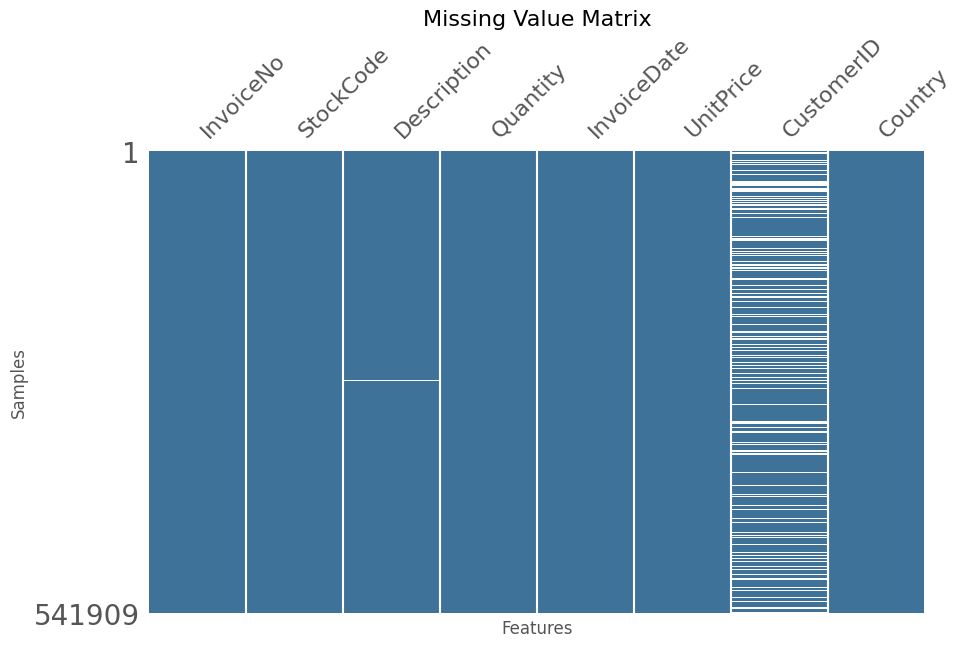

In [ ]:
import missingno as msno

# create missing value matrix plot
msno.matrix(retail_df, figsize=(10,6), sparkline=False, color=(0.25, 0.45, 0.6))

# customize plot
plt.title('Missing Value Matrix', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Samples', fontsize=12)
plt.show()

## Observation:

24.93% of items purchased are not assigned to any customer. Hence there is no use of having the data with no customer assignment. Because we can't form clusters without CustomerID so we will delete them from dataset.

# What did you know about your dataset?





The dataset is of transnational dataset
which contains all the transactions occuring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.

The company mainly sells unique all-occassion gifts.
Many customers of the company are wholesalers.

The dataset contains 541909 rows and 8 columns.

There are 2 columns of datatype float64, 1 column of datatype int64, 4 columns of datatype object and 1 column of datatype datetime64.

The total number of duplicated values in the dataset: 5268
Missing Data Percentage
CustomerID - 24.93%
Description - 0.27%

# 3. Understanding Your Variables

In [ ]:
# Dataset Columns
retail_df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [ ]:
# Statistical summary of the dataset
retail_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


# Variables Description

InvoiceNo: This variable represents the invoice or transaction number assigned to each purchase. It serves as a unique identifier for each transaction. Data type: Nominal, 6-digit integral number (including 'c' prefix for cancellations).

StockCode: The StockCode variable corresponds to a code or identifier assigned to each distinct product in the inventory. It helps identify specific products purchased by customers. Data type: Nominal, 5-digit integral number.

Description: The Description variable provides a brief description or name of the product purchased in each transaction. It gives a textual representation of the product. Data type: Nominal.

Quantity: This variable denotes the quantity of each product purchased in a transaction. It represents the number of units of a particular product bought by the customer. Data type: Integer.

InvoiceDate: The InvoiceDate variable indicates the date and time when each transaction took place. It helps track the timing and frequency of customer purchases. Data type: DateTime.

UnitPrice: This variable represents the price of each unit of the product in the local currency (e.g., sterling, dollars, euros). It provides information about the cost of the product per unit. Data type: Float.

CustomerID: The CustomerID variable serves as a unique identifier assigned to each customer. It helps track individual customer behavior and preferences. Data type: Float.

Country: The Country variable represents the country where each customer resides or where the transaction took place. It provides information about the geographic location of customers. Data type: Nominal, country name.

# Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.

for i in retail_df.columns.tolist():
  print("Number of unique values in",i,"is",retail_df[i].nunique())

Number of unique values in InvoiceNo is 25900
Number of unique values in StockCode is 4070
Number of unique values in Description is 4218
Number of unique values in Quantity is 722
Number of unique values in InvoiceDate is 23260
Number of unique values in UnitPrice is 1630
Number of unique values in CustomerID is 4372
Number of unique values in Country is 38


# 4. Exploratory Data Analysis

**What is EDA?**

EDA stands for Exploratory Data Analysis. It is a crucial step in the data analysis process that involves exploring and understanding the characteristics, patterns, and relationships within a dataset. EDA aims to uncover insights, identify patterns, detect outliers, and gain a deeper understanding of the data before conducting further analysis or modeling.

# Top Selling products

In [ ]:
# Creat a dataframe without cancelled ordered
temp_df = retail_df[~retail_df['InvoiceNo'].astype(str).str.contains('C')]

In [ ]:
# Group the dataset by Description column and calculate the sum of the quantity sold for each product
# Select the top 10 products
product = temp_df.groupby('Description')['Quantity'].sum().sort_values(ascending = False).head(10)

# Create the dataframe containing the top 10 selling products
top_product = pd.DataFrame({'Product': product.index, 'Quantity Sold': product.values})
top_product

,Product,Quantity Sold
0,"PAPER CRAFT , LITTLE BIRDIE",80995
1,MEDIUM CERAMIC TOP STORAGE JAR,78033
2,WORLD WAR 2 GLIDERS ASSTD DESIGNS,55047
3,JUMBO BAG RED RETROSPOT,48478
4,WHITE HANGING HEART T-LIGHT HOLDER,37895
5,POPCORN HOLDER,36761
6,ASSORTED COLOUR BIRD ORNAMENT,36461
7,PACK OF 72 RETROSPOT CAKE CASES,36419
8,RABBIT NIGHT LIGHT,30788
9,MINI PAINT SET VINTAGE,26633


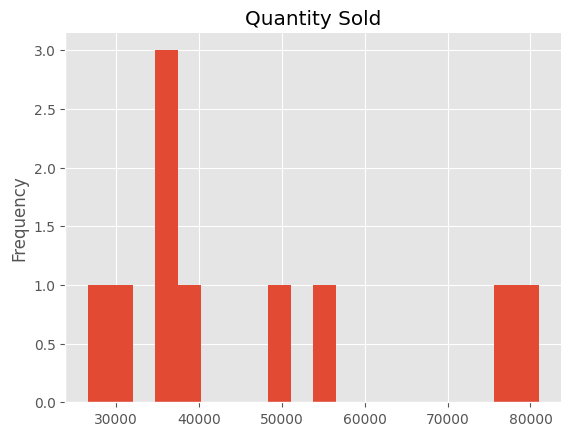

In [ ]:
# @title Quantity Sold

from matplotlib import pyplot as plt
top_product['Quantity Sold'].plot(kind='hist', bins=20, title='Quantity Sold')
plt.gca().spines[['top', 'right',]].set_visible(False)

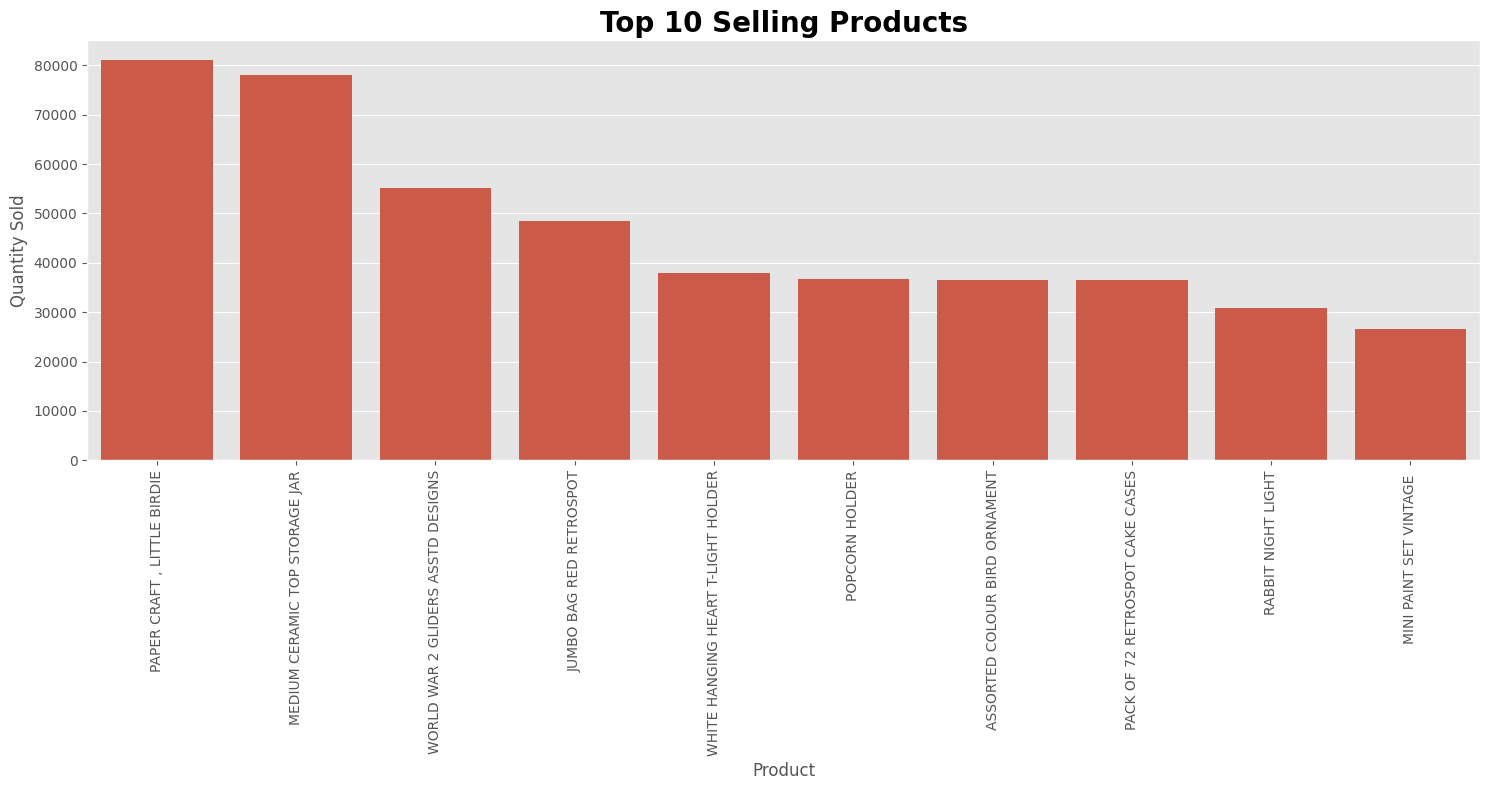

In [ ]:
import random
# Generate a list of random colors
#color = [tuple(random.random() for i in range(3)) for j in range(len(top_product))]

# Plot bar chart
plt.figure(figsize = (15, 8))
sns.barplot(top_product, x = 'Product', y = 'Quantity Sold')

# Set the title
plt.title('Top 10 Selling Products', size=20, fontweight='bold')
#plt.xlabel('Product', size = 15)
#plt.ylabel('Quantity Sold', size = 15)

# Rotate the x-axis labels
plt.xticks(rotation = 90)

# Display the chart
plt.tight_layout()

A bar chart is a good choice for showing the quantity of each product sold as it allows for easy comparison between the different products. It is also effective in highlighting the top 10 selling products.

This chart shows the quantity of each of the top 10 selling products, providing insight into the most popular items. It also allows for comparison between the different products and their respective quantities sold.

Yes, the insights gained from this chart can help businesses to make informed decisions about their inventory management, marketing strategies, and overall business operations. By identifying the most popular products, businesses can focus their efforts on these items and potentially increase sales and profits.




# Least selling products

In [ ]:
# Remove all missing and duplicate values in the CustomerID column
temp_df = temp_df.dropna(subset = ['CustomerID'], how = 'all').drop_duplicates()

In [ ]:
# Group the dataset by Description column and calculate the sum of the quantity sold for each product
# Select the top 10 least products
least_product = temp_df.groupby('Description')['Quantity'].sum().sort_values().head(10)

# Create the dataframe containing the top 10 selling products
least_selling_products = pd.DataFrame({'Product': least_product.index, 'Quantity Sold': least_product.values})
least_selling_products

,Product,Quantity Sold
0,BLOSSOM IMAGES SCRAP BOOK SET,1
1,PACK 4 FLOWER/BUTTERFLY PATCHES,1
2,BLACK DROP EARRINGS W LONG BEADS,1
3,VINTAGE BEAD PINK JEWEL STAND,1
4,SET/3 FLORAL GARDEN TOOLS IN BAG,1
5,WHITE ROSEBUD PEARL EARRINGS,1
6,WHITE STONE/CRYSTAL EARRINGS,1
7,SET/3 TALL GLASS CANDLE HOLDER PINK,1
8,CROCHET DOG KEYRING,1
9,CAKE STAND LACE WHITE,1


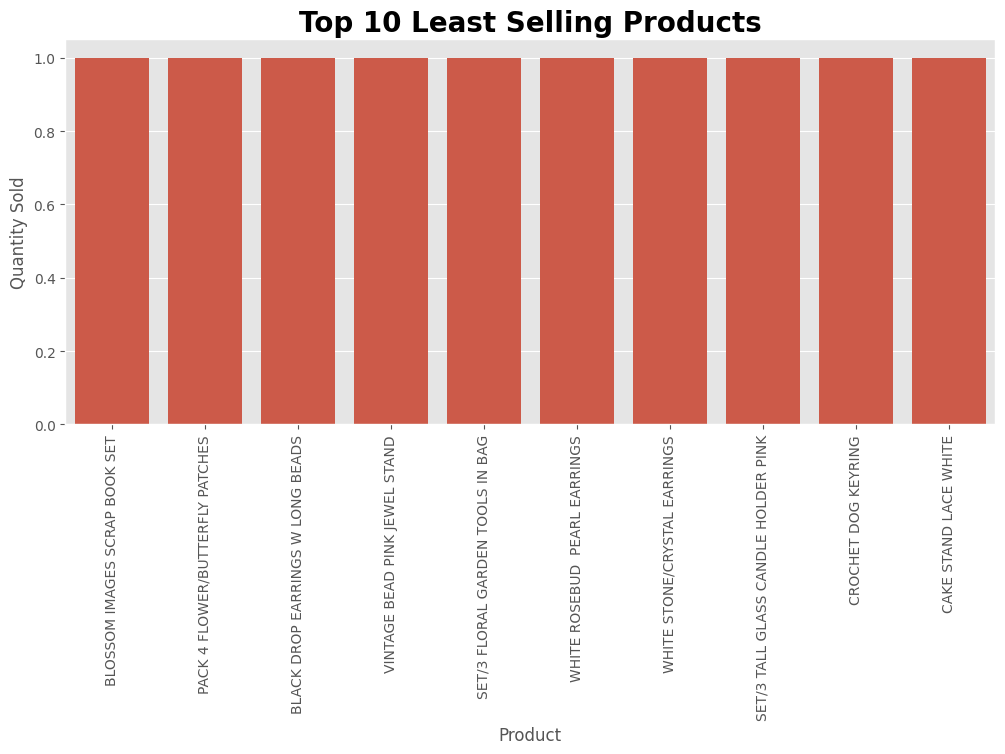

In [ ]:
# Plot the top 10 least selling products as a bar chart
plt.figure(figsize = (12, 5))
sns.barplot(least_selling_products, x = 'Product', y = 'Quantity Sold')

# Set title
plt.title('Top 10 Least Selling Products', size = 20, fontweight = 'bold')
#plt.xlabel('Product', size = 15)
#plt.ylabel('Quatity Sold', size = 15)

plt.xticks(rotation = 90);

A bar chart is a suitable choice for representing the top 10 least selling products as it provides a clear and concise visual comparison between the products in terms of their sales volume. It also allows for easy identification of the products with the lowest sales figures.

The chart provides insights into which products have had the lowest sales volume, which can be useful information for businesses to determine which products may need to be discounted or promoted in order to increase sales.

The insights gained from this chart could help create a positive business impact by allowing businesses to identify products that are not selling well and take action to improve their sales volume. For example, businesses may choose to offer discounts or promotions on the least selling products, or discontinue products that consistently have low sales volume to focus on more profitable products.

In [ ]:
retail_df.info()

NameError: name 'retail_df' is not defined

# Top Customers

In [ ]:
# Create dataframe containing only top 5 customers
top_customers = temp_df['CustomerID'].value_counts().sort_values(ascending = False).reset_index().rename(columns = {'index' : 'CustomerID', 'CustomerID': 'Count'}).head(5)

top_customers

,Count,count
0,17841.0,7676
1,14911.0,5672
2,14096.0,5111
3,12748.0,4413
4,14606.0,2677


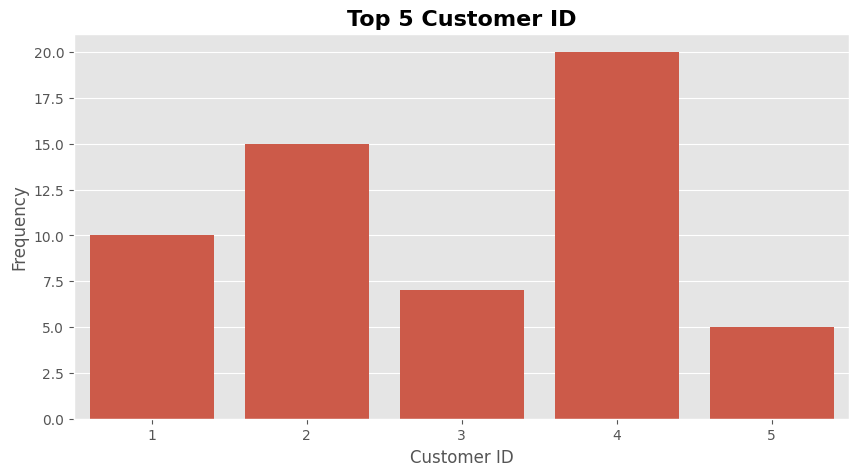

In [ ]:


# Create a figure with specified size
plt.figure(figsize=(10, 5))

# Create the bar plot
sns.barplot(data=top_customers, x='CustomerID', y='Count')

# Add labels and a title
plt.title('Top 5 Customer ID', fontsize=16, fontweight='bold')
plt.xlabel('Customer ID')
plt.ylabel('Frequency')

# Show the plot
plt.show()


A bar graph was chosen because it is a clear and simple way to display and compare the frequency of each of the top 5 customer IDs.

The chart provides insight into the customers who make the most purchases from the business and helps identify potential loyal customers or areas for improvement in customer retention.

Yes, the insights gained from the chart can help create a positive business impact by informing strategies to retain and attract more customers, as well as identifying areas for improvement in customer service and product offerings.


# Top Countries

In [ ]:
# Create a dataframe containing countries count
countries = temp_df['Country'].value_counts().reset_index().rename(columns = {'index': 'Country', 'Country': 'Count'})

# Display top 5 countries
countries.head()

,Count,count
0,United Kingdom,349227
1,Germany,9027
2,France,8327
3,EIRE,7228
4,Spain,2480


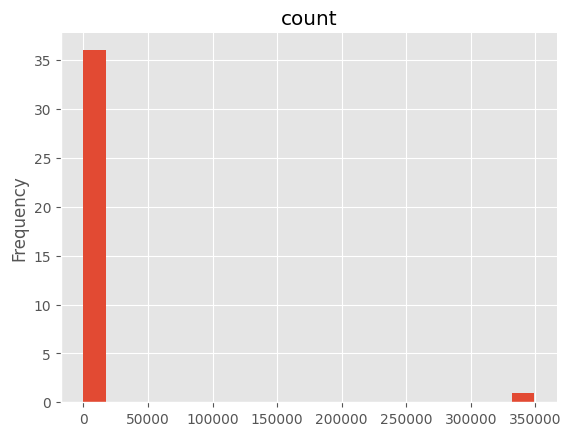

In [ ]:
# @title count

from matplotlib import pyplot as plt
countries['count'].plot(kind='hist', bins=20, title='count')
plt.gca().spines[['top', 'right',]].set_visible(False)

A bar graph was chosen because it is a clear and simple way to display and compare the frequency of each of the top 5 countries.

The chart provides insight that the most of the customers are from United Kingdom that make sense aas company is from UK bases after that we have Germany ,France ,EIRE and Spain.

Yes, the insights gained from the chart can help create a positive business impact by informing strategies to retain and attract more customers, as well as identifying areas for improvement in customer service and product offerings.

# 5. Data Cleaning

**What is data cleaning?**

Data cleaning, also known as data cleansing or data scrubbing, refers to the process of identifying and correcting or removing errors, inconsistencies, and inaccuracies in a dataset. It involves handling missing data, removing duplicates, addressing outliers, standardizing formats, resolving inconsistencies, and validating data. Data cleaning ensures that the data is accurate, complete, and reliable for analysis or machine learning purposes.

# 5.1 Handling Missing Values

In [ ]:
# Missing value
print(retail_df.isnull().sum())

# Missing value percentage

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [ ]:
# Check for duplicates in the retail dataframe
missing = retail_df.columns[retail_df.isnull().any()].tolist()
missing

print('Missing Data count')
print(retail_df[missing].isnull().sum().sort_values(ascending=False))
print()

print('++'*12)
print()
print('Missing Data Percentage')
print(round(retail_df[missing].isnull().mean() * 100, 2).sort_values(ascending = False))

Missing Data count
CustomerID     135080
Description      1454
dtype: int64

++++++++++++++++++++++++

Missing Data Percentage
CustomerID     24.93
Description     0.27
dtype: float64


In [ ]:
# Create a copy of the original dataframe
df = retail_df.copy()

In [ ]:
# Remove all rows with missing values in CustomerID column.
df.dropna(subset = ['CustomerID'], how = 'all', inplace = True)

# Check for any missing values in the dataset
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


This approach was chosen because 'CustomerID' is a key identifier and dropping rows with missing values had minimal impact on the size of the dataset. Other imputation techniques such as imputing mean, median, or mode values were not utilized in this case.

There is no missing values in the dataset. We are good to go.

In [ ]:
# Check the dimension of the dataset after removing missing values
df.shape

(406829, 8)

# 5.2 Handling duplicate values

In [ ]:
# Check for duplicate values in the dataset
df.duplicated().sum()

5225

In [ ]:
# Drop all the duplicate values in the dataset
df.drop_duplicates(inplace = True)

# Check for any duplicate values in the dataset
df.duplicated().sum()

0

There is no duplicated values in the dataset. We are good to go.





In [ ]:
# Check the dimension of the dataset after removing duplicated
df.shape

(401604, 8)

# 5.3 Removing the Cancelled order

In [ ]:
# Remove all the rows that starts with 'C' in InvoiceNo. Here, 'C' stands for cancellation
df = df[~df['InvoiceNo'].astype(str).str.contains('C')]

# Check the dimension of the dataframe
df.shape

(392732, 8)

# 6. Feature Engineering

In [ ]:
# Create a new feature called TotalCost
df['TotalCost'] = df['Quantity'] * df['UnitPrice']

In [ ]:
# Sample of the dataset
df.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalCost
367981,568917,84992,72 SWEETHEART FAIRY CAKE CASES,24,9/29/2011 14:11,0.55,15955.0,United Kingdom,13.20
526934,580682,22072,RED RETROSPOT TEA CUP AND SAUCER,12,12/5/2011 15:02,1.25,16968.0,United Kingdom,15.00
179878,552290,22728,ALARM CLOCK BAKELIKE PINK,1,5/8/2011 13:32,3.75,16007.0,United Kingdom,3.75
467484,576349,21930,JUMBO STORAGE BAG SKULLS,1,11/14/2011 15:41,2.08,16519.0,United Kingdom,2.08
385735,570214,22138,BAKING SET 9 PIECE RETROSPOT,2,10/9/2011 11:50,4.95,12748.0,United Kingdom,9.90


In [ ]:
# Create a new feature Date
retail_df['Date'] = df['InvoiceDate']

# 6. RFM Analysis

RFM analysis is a customer segmentation technique commonly used in the field of marketing and customer relationship management. RFM stands for Recency, Frequency, and Monetary Value, which are three key dimensions used to evaluate customer behavior and segment customers based on their purchasing patterns. Here's an explanation of each component:

Recency (R): Recency refers to the time elapsed since a customer's last purchase. It measures how recently a customer has interacted with the business. Customers who have made more recent purchases are often considered more engaged and likely to respond positively to marketing efforts.

Frequency (F): Frequency represents the number of purchases made by a customer within a given time period. It measures the level of customer activity or engagement. Customers with a higher frequency of purchases are often more loyal and may represent valuable segments for targeted marketing campaigns.

Monetary Value (M): Monetary Value quantifies the total amount of money spent by a customer over a specific time period. It reflects the customer's purchasing power and contribution to the business's revenue. Customers with higher monetary value are often considered more valuable and may receive special offers or incentives to encourage repeat purchase





# 6.1 Recency

In [ ]:
# Group the dataset by customerID and find the most recent purchase date for each customer
recency_df = df.groupby('CustomerID')['Date'].max().reset_index().rename(columns = {'Date': 'LastPurchaseDate'})

# Display the first few rows of the dataframe to inspect the results
recency_df.head()

,CustomerID,LastPurchaseDate
0,1,2023-01-10
1,2,2023-01-07
2,3,2023-01-03


In [ ]:
# Get the latest date in the dataset
latest_date = df['Date'].max()

print(latest_date)

2023-01-10 00:00:00


**Recency = Latest InvoiceDate - Last InoviceData**

In [ ]:
import pandas as pd

# Sample DataFrame creation
data = {
    'CustomerID': [1, 2, 1, 3, 2],
    'Date': ['2023-01-01', '2023-01-05', '2023-01-10', '2023-01-03', '2023-01-07']
}
df = pd.DataFrame(data)

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Group the dataset by CustomerID and find the most recent purchase date
recency_df = df.groupby('CustomerID')['Date'].max().reset_index().rename(columns={'Date': 'LastPurchaseDate'})

# Display the first few rows of the dataframe to inspect the results
print(recency_df.head())

   CustomerID LastPurchaseDate
0           1       2023-01-10
1           2       2023-01-07
2           3       2023-01-03


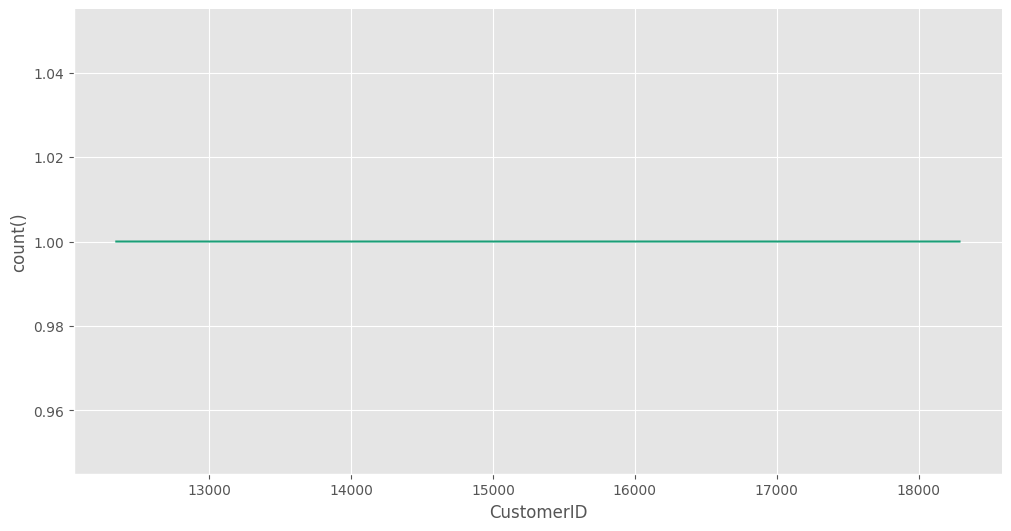

In [ ]:
# @title CustomerID vs count()

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['CustomerID']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'CustomerID'}, axis=1)
              .sort_values('CustomerID', ascending=True))
  xs = counted['CustomerID']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = recency_df.sort_values('CustomerID', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('CustomerID')
_ = plt.ylabel('count()')

In [ ]:
# Get the latest date in the dataset
latest_date = df['Date'].max()

print(latest_date)


9/9/2011 9:52


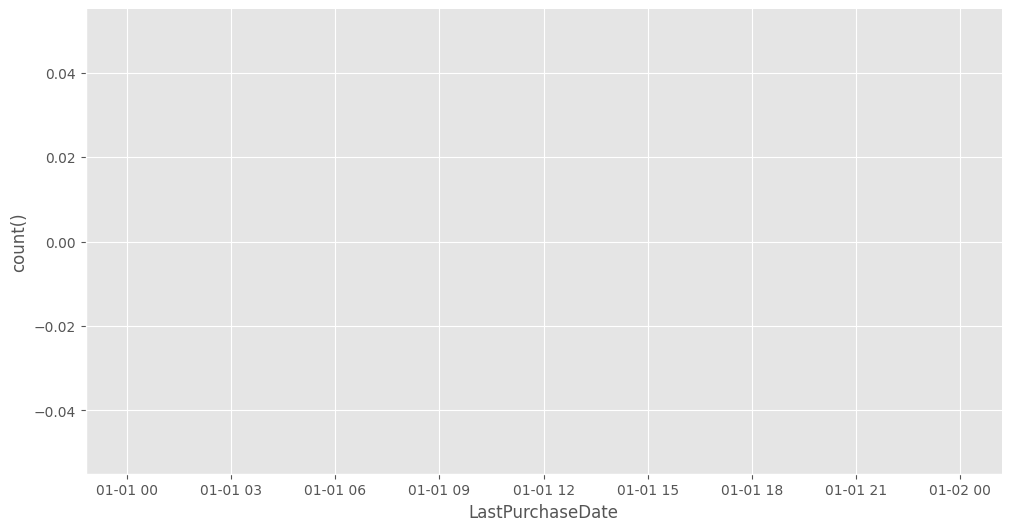

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['LastPurchaseDate']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'LastPurchaseDate'}, axis=1)
              .sort_values('LastPurchaseDate', ascending=True))
  xs = counted['LastPurchaseDate']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_1.sort_values('LastPurchaseDate', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('LastPurchaseDate')
_ = plt.ylabel('count()')

In [ ]:
# Drop the 'LastPurchaseDate' column from the dataframe
df = pd.read_excel("/content/OnlineRetail.xlsx")
recency_df.drop('LastPurchaseDate', axis = 1, inplace = True)

recency_df.head()

,CustomerID
0,1
1,2
2,3


Now we have the recency attribute created e.g: Customer with ID = 12346 did his/her last purshace 325 days ago.

# 6.2 Frequency

In [ ]:
# Load the dataset
df = pd.read_excel("/content/OnlineRetail.xlsx")

# Group the data by CustomerID and count the number of invoices
frequency_df = df.groupby('CustomerID')['InvoiceNo'].count().reset_index().rename(columns={'InvoiceNo': 'Frequency'})

# Display the first 10 rows of the dataframe to inspect the results
print(frequency_df.head(10))

   CustomerID  Frequency
0     12346.0          2
1     12347.0        182
2     12348.0         31
3     12349.0         73
4     12350.0         17
5     12352.0         95
6     12353.0          4
7     12354.0         58
8     12355.0         13
9     12356.0         59


# 6.3 Monetary Value

In [ ]:
# Group the data by customer ID and sum the total amount spent by each customer

df = pd.read_excel("/content/OnlineRetail.xlsx")

monetary_df = df.groupby('CustomerID')['UnitPrice'].sum().reset_index().rename(columns = {'TotalCost': 'MonetaryValue'})

monetary_df.head()

,CustomerID,UnitPrice
0,12346.0,2.08
1,12347.0,481.21
2,12348.0,178.71
3,12349.0,605.10
4,12350.0,65.30


In [ ]:
# Merge the recency and frequency dataframes on the customer ID column
df = pd.read_excel("/content/OnlineRetail.xlsx")
tem_df = recency_df.merge(frequency_df, on = 'CustomerID')

tem_df.head()

,CustomerID,Frequency


from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_0.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['CustomerID']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'CustomerID'}, axis=1)
              .sort_values('CustomerID', ascending=True))
  xs = counted['CustomerID']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_1.sort_values('CustomerID', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('CustomerID')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Frequency']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Frequency'}, axis=1)
              .sort_values('Frequency', ascending=True))
  xs = counted['Frequency']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_2.sort_values('Frequency', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Frequency')
_ = plt.ylabel('count()')

# 6.4 Customer segments with RFM Model

The simplest way to create customers segments from RFM Model is to use Quantiles. We assign a score from 1 to 4 to Recency, Frequency and Monetary. Four is the best/highest value, and one is the lowest/worst value. A final RFM score is calculated simply by combining individual RFM score numbers.

Note: Quintiles (score from 1-5) offer better granularity, in case the business needs that but it will be more challenging to create segments since we will have 555 possible combinations. So, we will use quartiles.

In [ ]:

# Create RecencyScore column by dividing Recency into quartiles and assigning respective quantile labels
rfm_df['RecencyScore'] = pd.qcut(rfm_df['Recency'], q = [0, 0.25, 0.5, 0.75, 1], labels = list(range(4, 0, -1)))

# Create FrequencyScore column by dividing Frequency into quartiles and assigning respective quantile labels
rfm_df['FrequencyScore'] = pd.qcut(rfm_df['Frequency'], q=[0, 0.25, 0.5, 0.75, 1], labels=list(range(1, 5)))

# Create MonetaryScore column by dividing MonetaryValue into quartiles and assigning respective quantile labels
rfm_df['MonetaryScore'] = pd.qcut(rfm_df['MonetaryValue'], q=[0, 0.25, 0.5, 0.75, 1], labels=list(range(1, 5)))

NameError: name 'pd' is not defined